**Variant 1**

2D transform

Perspective Transformation

In [8]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib

409.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


415.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


421.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import requests
%matplotlib inline

In [15]:
url = "https://7themes.su/php/imres/resize.php?width=960&height=640&cropratio=3:2&image=/_ph/26/802844975.jpg"
r = requests.get(url)
with open('background.jpg', 'wb') as f:
    f.write(r.content)
img = cv2.imread('background.jpg')

url = "https://pavelk.ru/wp-content/uploads/sheet-300x259.jpg"
r = requests.get(url)
with open('table.jpg', 'wb') as f:
    f.write(r.content)
table_img = cv2.imread('table.jpg')

In [16]:
# Window name in which image is displayed
window_name = 'Background'
# represents the top left corner of rectangle
start_point = (80, 80) 
# represents the bottom right corner of rectangle
end_point = (880, 560)
# Red color in RGB
color = (255, 0, 0)
# Line thickness of 10px
thickness = 10
# Draw a rectangle with red line borders of thickness of 10px
img = cv2.rectangle(img, start_point, end_point, color, thickness)

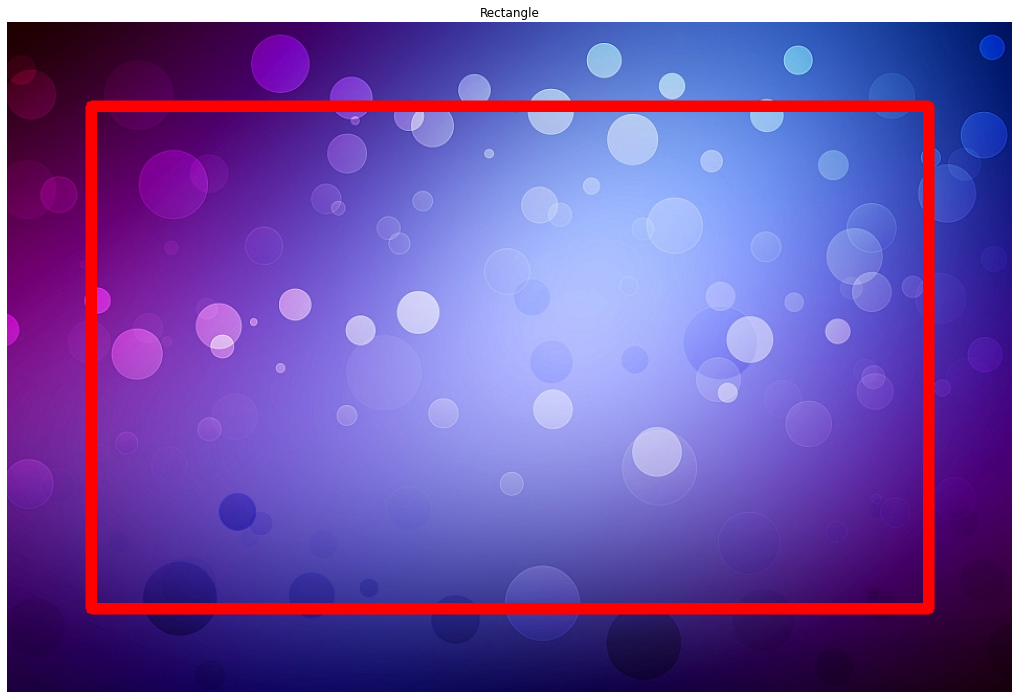

In [17]:
plt.figure(figsize=(18, 19))
plt.imshow(img)
plt.title("Rectangle")
plt.axis("off")
plt.show()

In [13]:
# Get image shape
rows, cols, dim = img.shape

**Translation**

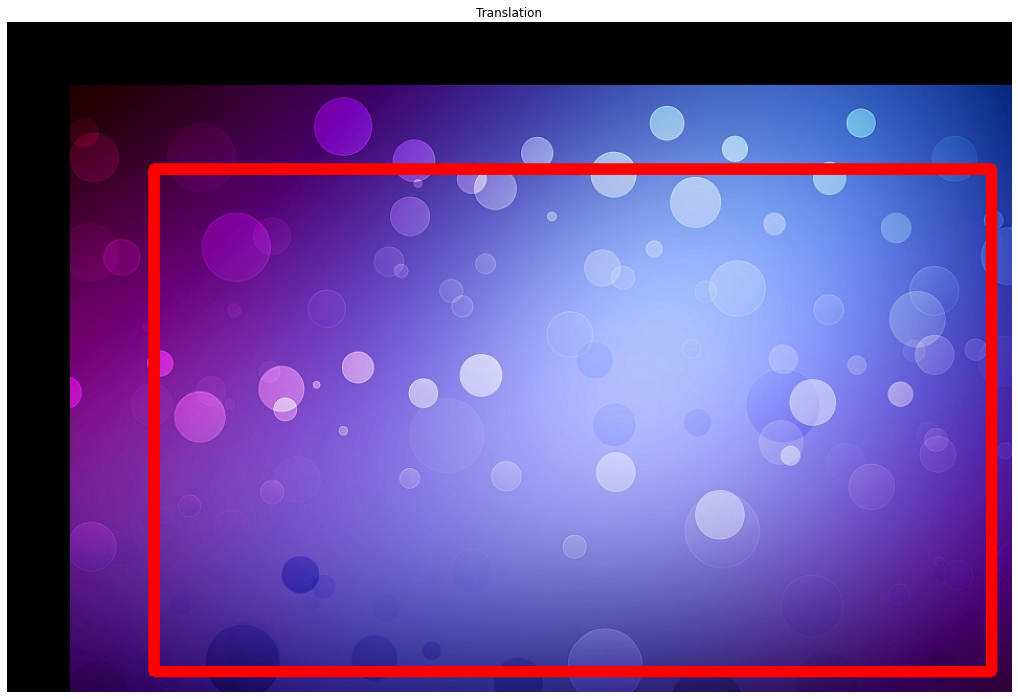

In [14]:
# Transformation matrix for translation
# нашли 4 точки на картинке, в данном случае — углы листа, по часовой стрелке, начиная с верхнего левого:
# TODO повернуть table_img
# [20, 340]
# [860,110]
# [1160, 650]
# [200, 950]
matrix = np.float32([ [1, 0, 60],
                      [0, 1, 60],
                      [0, 0, 1 ] ])

# Apply perspective transform to the image
translated_img = cv2.warpPerspective(img, matrix, (cols, rows))

plt.figure(figsize=(18, 19))
plt.imshow(translated_img)
plt.title("Translation")
plt.axis("off")
plt.show()



# Scaling

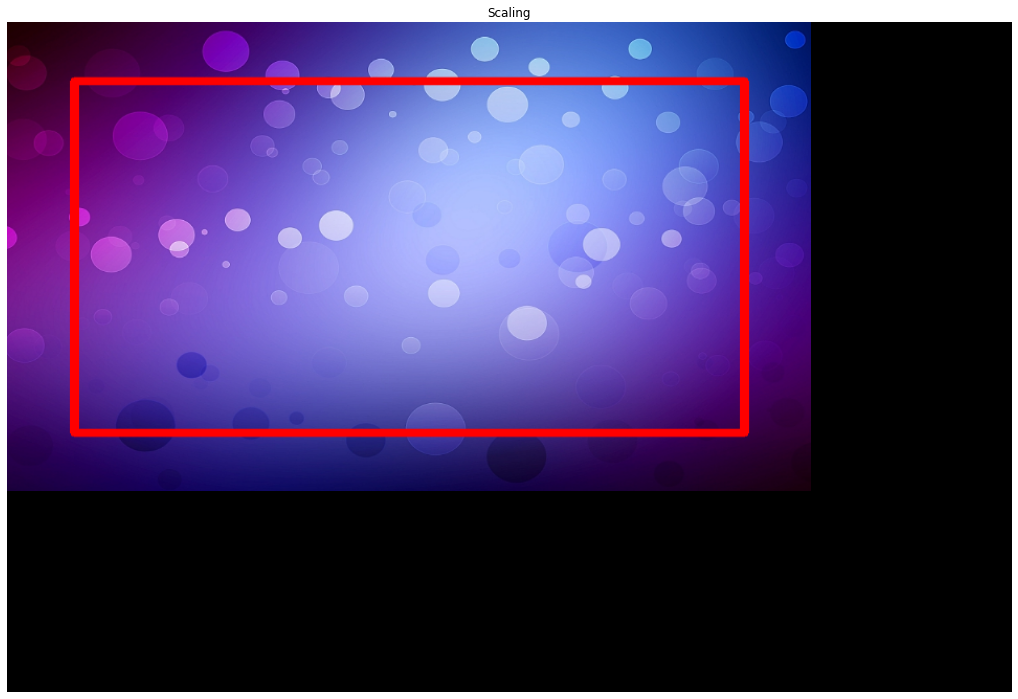

In [ ]:
# Transformation matrix for scaling
matrix = np.float32([ [0.8, 0  , 0],
                      [0  , 0.7, 0],
                      [0  , 0  , 1] ])

# Apply perspective transform to the image
scaled_img = cv2.warpPerspective(img, matrix, (cols, rows))

plt.figure(figsize=(18, 19))
plt.imshow(scaled_img)
plt.title("Scaling")
plt.axis("off")
plt.show()

**Shearing**

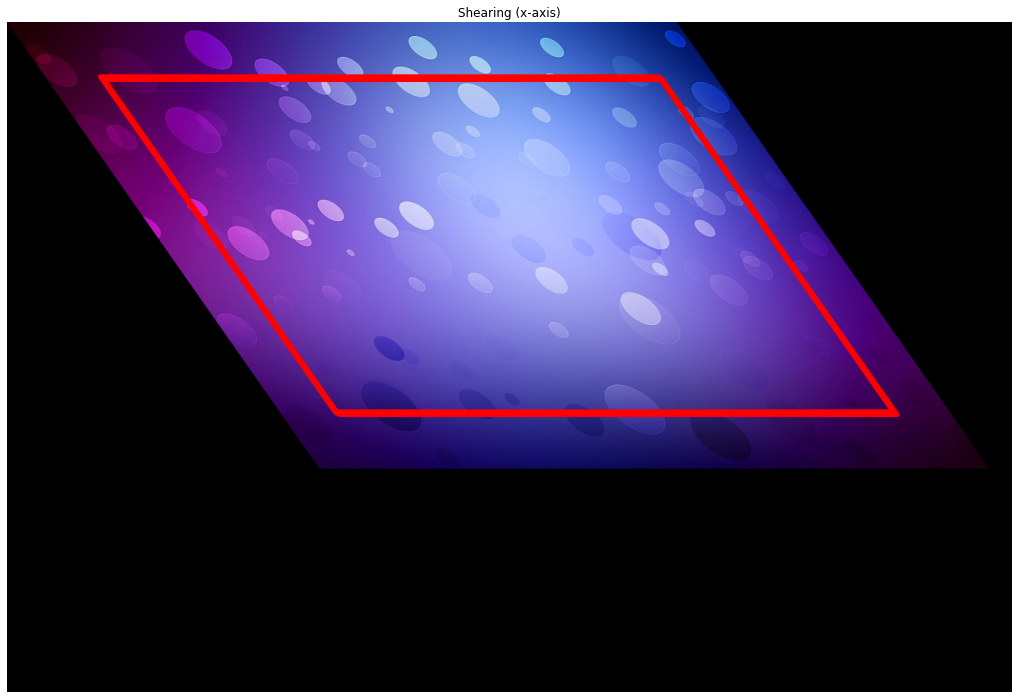

In [ ]:
# transformation matrix for shearing
# Shearing applied to the x-axis
x_matrix = np.float32([ [1, 0.7, 0],
                        [0, 1  , 0],
                        [0, 0  , 1] ])

# Apply perspective transform to the image
x_sheared_img = cv2.warpPerspective(img, x_matrix, (int(cols * 1.5), int(rows * 1.5)))

plt.figure(figsize=(18, 19))
plt.imshow(x_sheared_img)
plt.title("Shearing (x-axis)")
plt.axis("off")
plt.show()


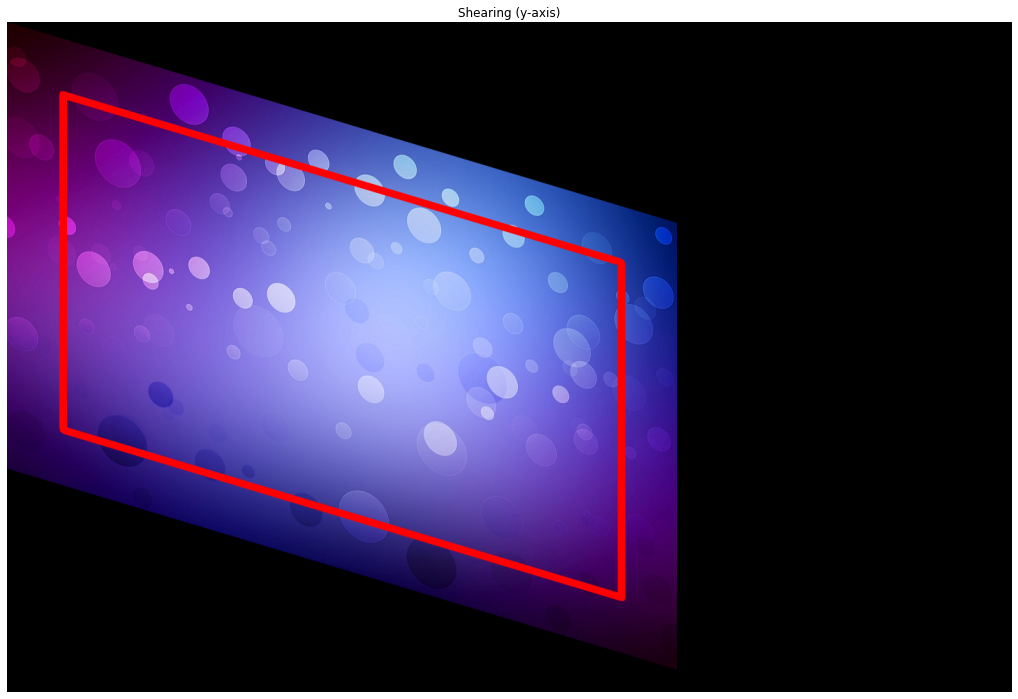

In [ ]:
# transformation matrix for shearing
# Shearing applied to the y-axis
y_matrix = np.float32([ [1,   0, 0],
                        [0.3, 1, 0],
                        [0,   0, 1] ])

# Apply perspective transform to the image
y_sheared_img = cv2.warpPerspective(img, y_matrix, (int(cols * 1.5), int(rows * 1.5)))

plt.figure(figsize=(18, 19))
plt.imshow(y_sheared_img)
plt.title("Shearing (y-axis)")
plt.axis("off")
plt.show()

**Reflection**

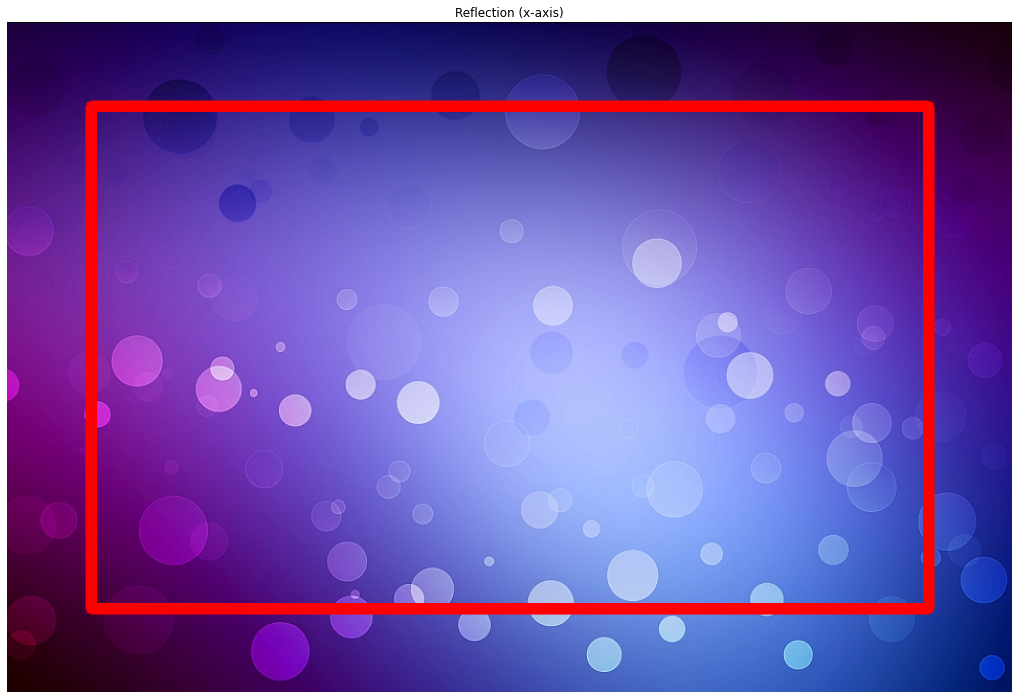

In [ ]:
# transformation matrix for x-axis reflection 
x_matrix = np.float32([ [1,  0, 0   ],
                        [0, -1, rows],
                        [0,  0, 1   ] ])

# Apply perspective transform to the image
x_reflected_img = cv2.warpPerspective(img, x_matrix, (cols, rows))

plt.figure(figsize=(18, 19))
plt.imshow(x_reflected_img)
plt.title("Reflection (x-axis)")
plt.axis("off")
plt.show()

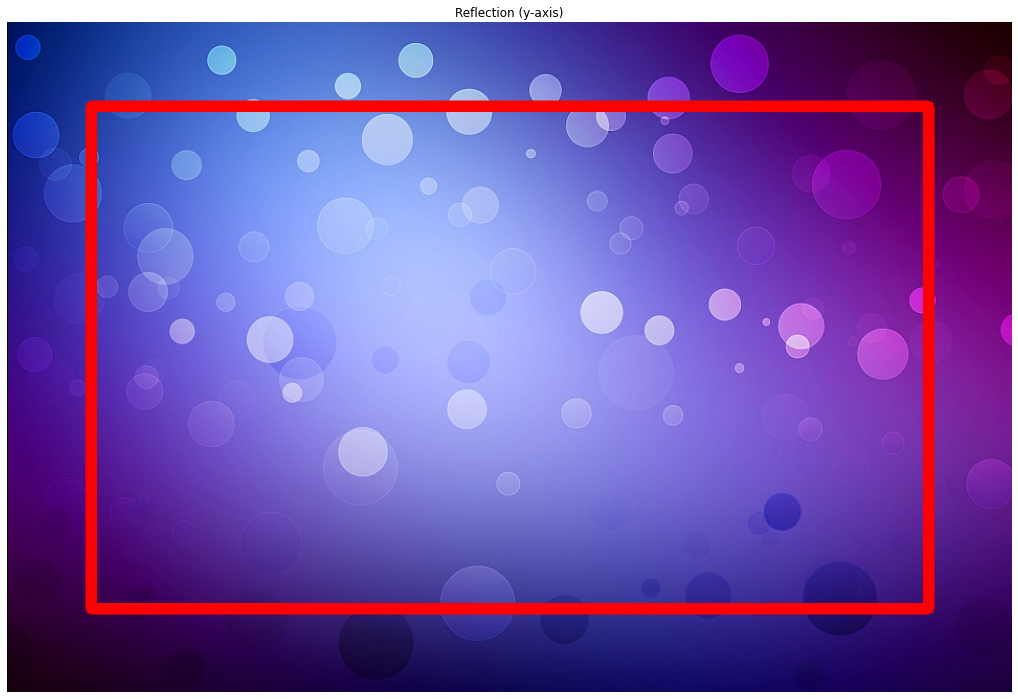

In [ ]:
# transformation matrix for y-axis reflection 
y_matrix = np.float32([ [-1, 0, cols],
                        [0 , 1, 0   ],
                        [0 , 0, 1   ] ])

# Apply perspective transform to the image
y_reflected_img = cv2.warpPerspective(img, y_matrix, (cols, rows))

plt.figure(figsize=(18, 19))
plt.imshow(y_reflected_img)
plt.title("Reflection (y-axis)")
plt.axis("off")
plt.show()

**Rotation**

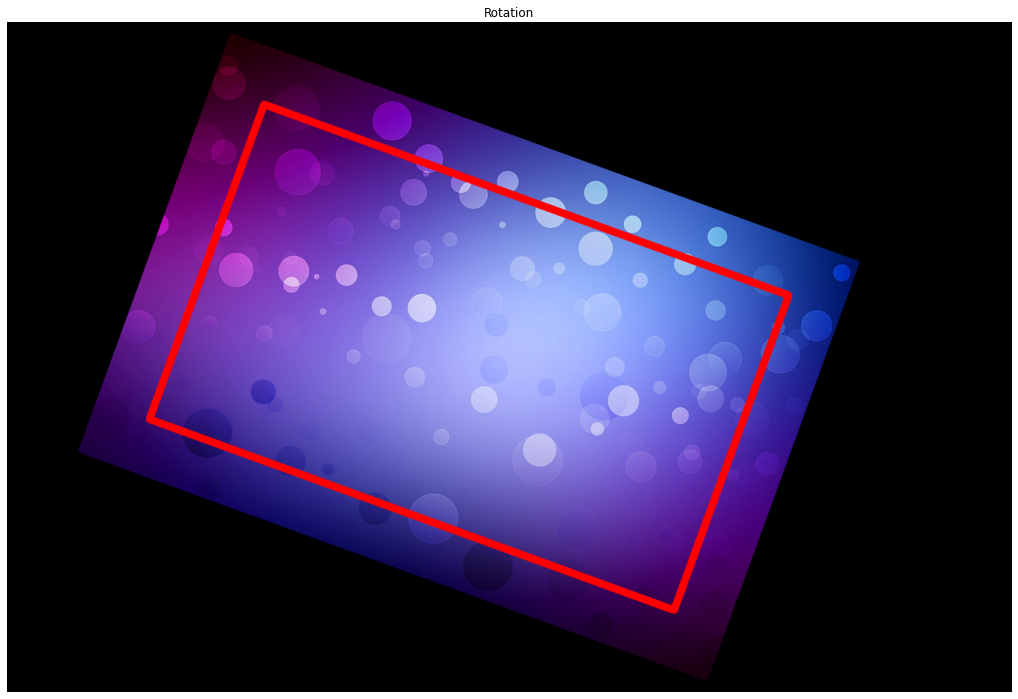

In [ ]:
# Rotation angle in radians
angle = np.radians(20)

# Transformation matrix for rotation
matrix = np.float32([ [np.cos(angle), -np.sin(angle), 320],
                      [np.sin(angle), np.cos(angle) , 15 ],
                      [0            ,              0, 1  ] ])


# Apply perspective transform to the image
rotated_img = cv2.warpPerspective(img, matrix, (int(cols * 1.5), int(rows * 1.5)))

plt.figure(figsize=(18, 19))
plt.imshow(rotated_img)
plt.title("Rotation")
plt.axis("off")
plt.show()

**Cropping**

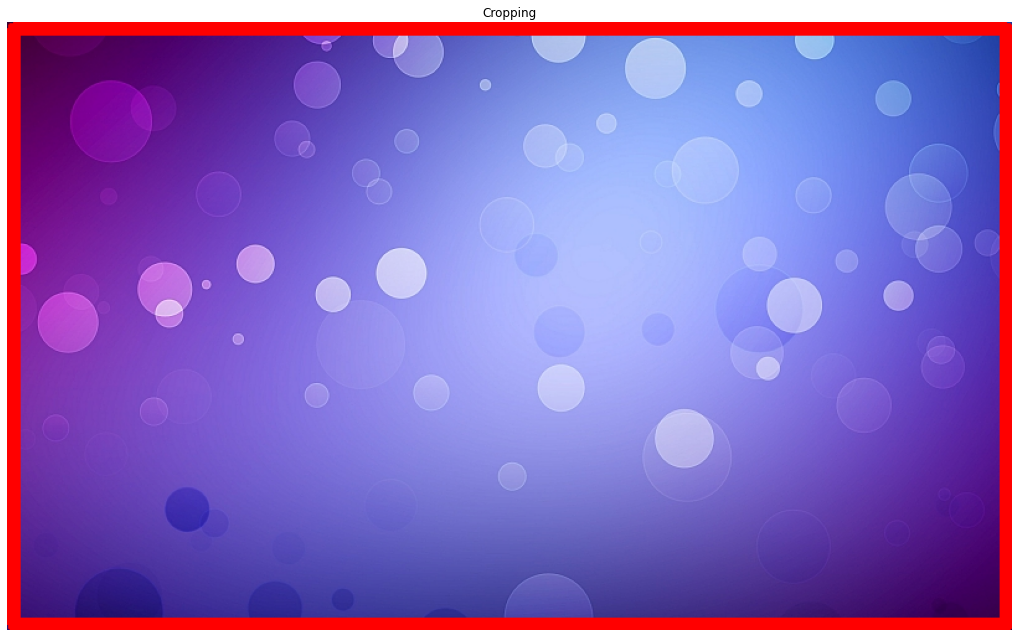

In [ ]:
cropped_img = img[75:565, 75:885]

plt.figure(figsize=(18, 19))
plt.imshow(cropped_img)
plt.title("Cropping")
plt.axis("off")
plt.show()

## Задача 1.
Выровнить table_img
1. [20, 340]
1. [860,110]
1. [1160, 650]
1. [200, 950]